# Fake News Classification Project

### Imports:
The following libraries were used in this project:

- **pandas**: Data manipulation and analysis.
- **nltk**: Natural Language Toolkit for text processing.
- **re**: Regular expressions for text cleaning.
- **stopwords**: A set of common words that are removed during text preprocessing.
- **PorterStemmer**: Used for stemming words.
- **TfidfVectorizer**: Converts text data into numerical features using TF-IDF.
- **train_test_split**: Splits the dataset into training and testing sets.
- **matplotlib**: For plotting graphs.
- **WordCloud**: For visualizing the frequency of words in the dataset.
- **Counter**: To count occurrences of elements in the dataset.
- **LogisticRegression**: A classification model used for binary classification.
- **MultinomialNB**: Naive Bayes classifier for text classification.
- **SVC**: Support Vector Classifier.
- **accuracy_score, precision_score, recall_score, f1_score**: Metrics for evaluating model performance.
- **confusion_matrix**: For calculating confusion matrices.
- **joblib**: For saving and loading models and vectorizers.
- **seaborn**: For creating statistical plots.
- **roc_curve, auc**: For plotting and calculating ROC curves.


In [24]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split


# Data Preprocessing and Exploration

### Dataset Loading:
The project begins by loading two datasets:
- **True.csv**: Contains news articles labeled as real (True).
- **Fake.csv**: Contains news articles labeled as fake (Fake).

The columns of **True.csv** are printed for inspection, and the first few rows are displayed to confirm the data structure.

### Column Renaming:
The column names for the **True.csv** dataset are renamed to represent the data more clearly:
- `title`: The title of the news article.
- `text`: The body content of the news article.
- `subject`: The subject or category of the article.
- `date`: The publication date of the article.

### Label Assignment:
- **True news** is labeled as `0`.
- **Fake news** is labeled as `1`.

### Combining the Datasets:
The **True.csv** and **Fake.csv** datasets are then concatenated into a single dataframe, with a new label column added to indicate whether the news is real or fake.

The first few rows of the combined dataset are displayed to ensure everything is in order before proceeding with further processing.


In [25]:
import pandas as pd

data_true = pd.read_csv('True.csv')
data_false = pd.read_csv('Fake.csv')

print("Columns in True.csv:", data_true.columns)
print("Sample data from True.csv:")
print(data_true.head())

data_true.columns = ['title', 'text', 'subject', 'date']

data_true['label'] = 0
data_false['label'] = 1

data = pd.concat([data_true, data_false])

data.head()


Columns in True.csv: Index(['New York governor questions the constitutionality of federal tax overhaul',
       'NEW YORK/WASHINGTON (Reuters) - The new U.S. tax code targets high-tax states and may be unconstitutional, New York Governor Andrew Cuomo said on Thursday, saying that the bill may violate New York residents’ rights to due process and equal protection.  The sweeping Republican tax bill signed into law by U.S. President Donald Trump on Friday introduces a cap, of $10,000,  on deductions of state and local income and property taxes, known as SALT. The tax overhaul was the party’s first major legislative victory since Trump took office in January.  The SALT provision will hit many taxpayers in states with high incomes, high property values and high taxes, like New York, New Jersey and California. Those states are generally Democratic leaning.  “I’m not even sure what they did is legally constitutional and that’s something we’re looking at now,” Cuomo said in an interview with C

,title,text,subject,date,label
0,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,politicsNews,"December 28, 2017",0
1,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017",0
2,Man says he delivered manure to Mnuchin to pro...,"(In Dec. 25 story, in second paragraph, corre...",politicsNews,"December 25, 2017",0
3,Virginia officials postpone lottery drawing to...,(Reuters) - A lottery drawing to settle a tied...,politicsNews,"December 27, 2017",0
4,U.S. lawmakers question businessman at 2016 Tr...,WASHINGTON (Reuters) - A Georgian-American bus...,politicsNews,"December 27, 2017",0


# Text Preprocessing

### Downloading Stopwords:
The NLTK library is used to download a set of **stopwords** (common words like "the", "and", etc.) that will be removed during the preprocessing step.

### Text Preprocessing:
A function `preprocess_text` is defined to:
- Convert the text to lowercase.
- Remove punctuation using a regular expression.
- Remove **stopwords** using the NLTK stopword list.
- Apply **stemming** using the **Porter Stemmer**, reducing words to their root form (e.g., "running" becomes "run").

### Apply Preprocessing:
The `preprocess_text` function is applied to the **'text'** column of the dataset to create a new column called **'processed_text'**.

The first few rows of the processed text are displayed to confirm that the preprocessing is functioning as expected.


In [26]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text.lower())
        stop_words = set(stopwords.words('english'))
        words = [PorterStemmer().stem(word) for word in text.split() if word not in stop_words]
        return " ".join(words)
    return ""

data['processed_text'] = data['text'].apply(preprocess_text)

print(data['processed_text'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    follow statement post verifi twitter account u...
1    follow statement post verifi twitter account u...
2    dec 25 stori second paragraph correct name str...
3    reuter lotteri draw settl tie virginia legisl ...
4    washington reuter georgianamerican businessman...
Name: processed_text, dtype: object


# Text Vectorization

### TF-IDF Vectorization:
A **TfidfVectorizer** is initialized to convert the preprocessed text data into a numerical format that machine learning models can work with. The vectorizer transforms the **processed text** into a sparse matrix, where each row represents a document and each column represents a term (word) in the vocabulary.

### Data Preparation:
- The **fit_transform** method is used to apply the TF-IDF transformation on the **'processed_text'** column of the dataset, creating a numerical feature matrix `X`.
- The **labels** (`0` for real news, `1` for fake news) are extracted from the **'label'** column and stored in the variable `y`.

These transformed features (`X`) and labels (`y`) are now ready for model training and evaluation.


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data['processed_text'])

y = data['label']


# Train-Test Split

### Splitting the Dataset:
The dataset is split into training and testing sets using the **train_test_split** function from scikit-learn. The data is split into:
- **80% training data**: Used for training the models.
- **20% testing data**: Used to evaluate the performance of the trained models.

The `random_state=42` ensures that the split is reproducible, meaning that every time the code is run with the same random state, the split will be the same.

### Output:
The shapes of the training and testing feature matrices (`X_train` and `X_test`) are printed to confirm the split.


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


Shape of X_train: (35908, 198017)
Shape of X_test: (8978, 198017)


# Data Distribution Visualization

### Counting the Number of True and False News Articles:
The dataset is inspected to count the number of **True News** and **Fake News** articles based on the `label` column:
- **True News (label=0)**.
- **Fake News (label=1)**.

The counts are printed to give an overview of the dataset's balance.

### Visualization:
A bar plot is created to visualize the distribution of **True News** and **Fake News** in the dataset:
- The bars are colored **green** for True News and **red** for Fake News.
- The title and labels are added to make the plot informative.

This visualization helps understand the class distribution, which is important for tasks like **model evaluation** and **handling class imbalance**.


Number of True News: 21405
Number of False News: 23481


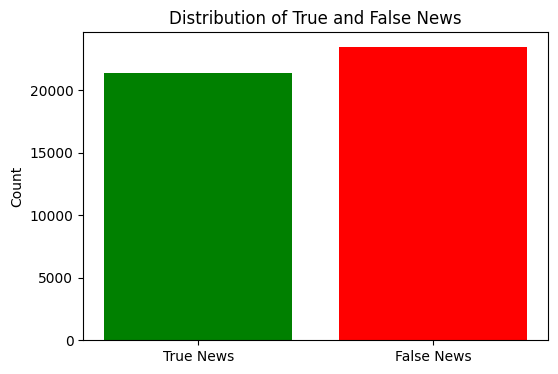

In [29]:
import matplotlib.pyplot as plt

true_count = data[data['label'] == 0].shape[0]
false_count = data[data['label'] == 1].shape[0]

print(f"Number of True News: {true_count}")
print(f"Number of False News: {false_count}")

plt.figure(figsize=(6, 4))
plt.bar(['True News', 'False News'], [true_count, false_count], color=['green', 'red'])
plt.title('Distribution of True and False News')
plt.ylabel('Count')
plt.show()


# Word Cloud Visualization

### Generating the Word Cloud:
A **Word Cloud** is created to visualize the most frequent words in the dataset. The **processed text** from all the articles is concatenated into a single string, and the **WordCloud** function is used to generate the visualization. The word cloud highlights the most frequent terms, where larger words appear more frequently in the dataset.

### Visualization:
The word cloud is displayed with:
- A white background.
- Words scaled by their frequency in the dataset.

This word cloud provides a quick visual representation of the most common words in the news articles, which can offer insights into key topics and themes in the dataset.


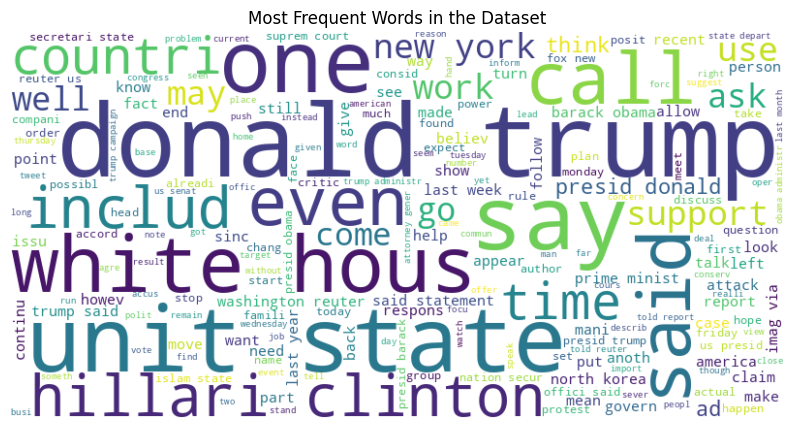

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(data['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in the Dataset')
plt.show()


# Text Length Analysis

### Handling Missing Values:
Any **missing values** (NaN) in the `text` column are replaced with an empty string to ensure consistency in the dataset.

### Calculating Text Length:
The **length of each article** is calculated based on the number of words (splitting the text by spaces). A new column, `text_length`, is created to store the word count for each article.

### Verifying Text Length:
The length of articles is verified separately for **True News** and **Fake News** to ensure the calculation is correct for both classes.

### Distribution of Text Length:
A **histogram** is plotted to show the distribution of text lengths for **True News** and **Fake News**:
- **Green bars** represent the text lengths of **True News**.
- **Red bars** represent the text lengths of **Fake News**.

This visualization provides insights into the typical article length for both real and fake news articles in the dataset.


Number of rows with empty text: 0
Sample True News Text Length: 0     99
1    192
2    348
3    442
4    690
Name: text_length, dtype: int64
Sample False News Text Length: 0    495
1    305
2    580
3    444
4    420
Name: text_length, dtype: int64


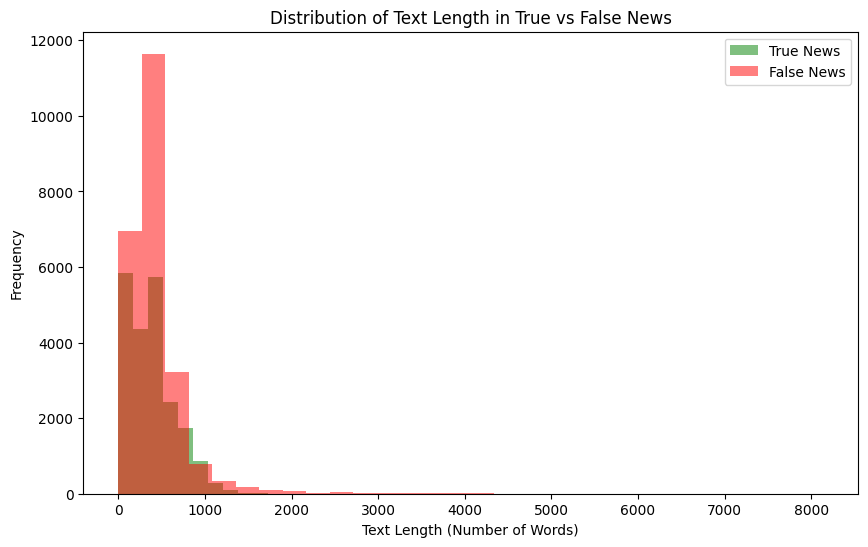

In [31]:
import matplotlib.pyplot as plt

data['text'] = data['text'].fillna('')

print(f"Number of rows with empty text: {data[data['text'] == ''].shape[0]}")

data['text_length'] = data['text'].apply(lambda x: len(x.split()))

print(f"True News Text Length: {data[data['label'] == 0]['text_length'].head()}")
print(f"False News Text Length: {data[data['label'] == 1]['text_length'].head()}")

plt.figure(figsize=(10, 6))
plt.hist(data[data['label'] == 0]['text_length'], bins=30, alpha=0.5, label='True News', color='green')
plt.hist(data[data['label'] == 1]['text_length'], bins=30, alpha=0.5, label='False News', color='red')
plt.title('Distribution of Text Length in True vs False News')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


# Boxplot of Text Length vs News Label

### Visualizing the Distribution of Text Lengths:
A **boxplot** is created to visualize the distribution of text lengths for **True News (0)** and **Fake News (1)**:
- **X-axis**: Represents the **news label** (`0` for True News and `1` for Fake News).
- **Y-axis**: Represents the **text length** (number of words in each article).

The boxplot helps to identify the spread, median, and potential outliers in the text length for both types of news, providing insights into whether one category tends to have longer or shorter articles than the other.


/tmp/ipython-input-3683253006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=data, palette='Set2')


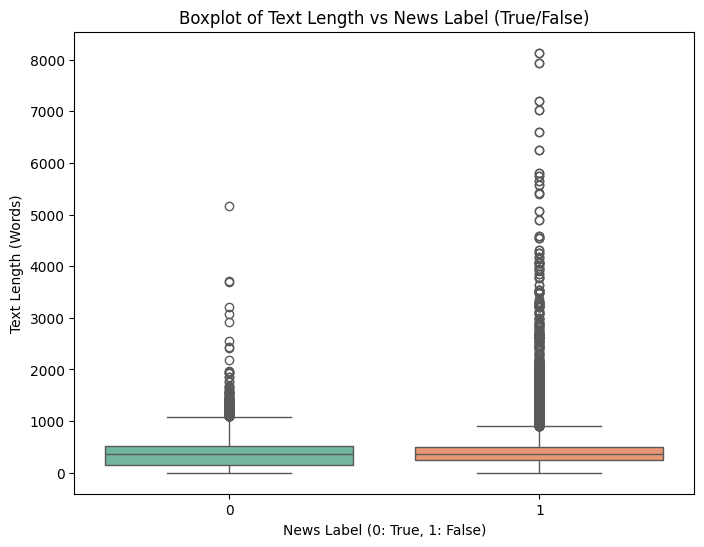

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='text_length', data=data, palette='Set2')
plt.title('Boxplot of Text Length vs News Label (True/False)')
plt.xlabel('News Label (0: True, 1: False)')
plt.ylabel('Text Length (Words)')
plt.show()


# Visualizing Most Frequent Words in True and False News

### Word Frequency Analysis:
The **most frequent words** in both **True News** and **Fake News** are extracted by splitting the text into words and counting their occurrences. The 10 most common words are then visualized using **bar plots**.

### Visualization:
Two **side-by-side bar plots** are created:
- **True News**: Visualizes the most frequent words in real news articles.
- **Fake News**: Visualizes the most frequent words in fake news articles.

The frequency of each word is plotted, and different color palettes are used to differentiate the two categories:
- **Blue** for True News.
- **Red** for Fake News.


/tmp/ipython-input-321481799.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=true_word_freq, ax=ax[0], palette='Blues')
/tmp/ipython-input-321481799.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=false_word_freq, ax=ax[1], palette='Reds')


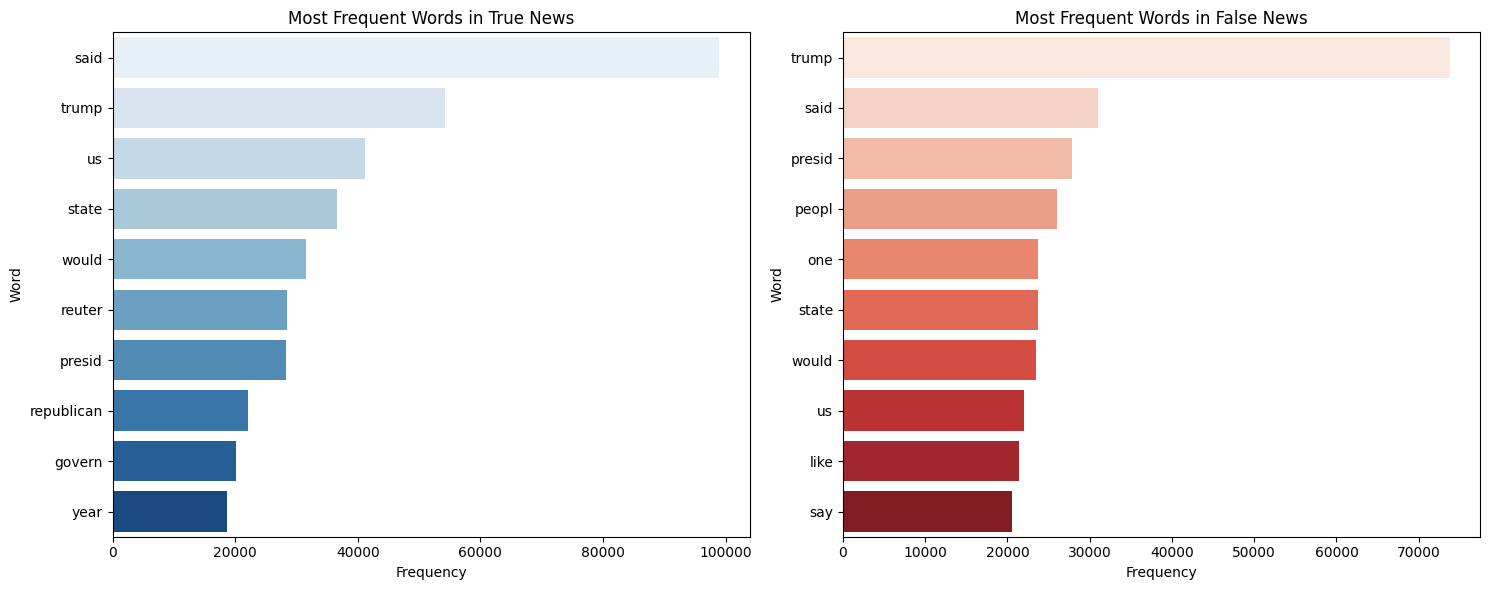

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Get the most frequent words in true and false news
true_words = ' '.join(data[data['label'] == 0]['processed_text']).split()
false_words = ' '.join(data[data['label'] == 1]['processed_text']).split()

true_word_freq = Counter(true_words).most_common(10)
false_word_freq = Counter(false_words).most_common(10)

# Convert to DataFrame
true_word_freq = pd.DataFrame(true_word_freq, columns=['Word', 'Frequency'])
false_word_freq = pd.DataFrame(false_word_freq, columns=['Word', 'Frequency'])

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# True news frequent words
sns.barplot(x='Frequency', y='Word', data=true_word_freq, ax=ax[0], hue='Word', palette='Blues', legend=False)
ax[0].set_title('Most Frequent Words in True News')

# False news frequent words
sns.barplot(x='Frequency', y='Word', data=false_word_freq, ax=ax[1], hue='Word', palette='Reds', legend=False)
ax[1].set_title('Most Frequent Words in False News')

# Adjust layout
plt.tight_layout()
plt.show()


# Model Training

### Scaling the Data:
The feature data (`X_train` and `X_test`) is scaled using **StandardScaler**. Since the data is sparse, the `with_mean=False` parameter is used to avoid centering the data (which is not suitable for sparse matrices).

### Model Initialization:
The following models are initialized:
- **Logistic Regression**: A linear model used for binary classification.
- **Naive Bayes**: A probabilistic classifier used for text classification tasks.
- **Random Forest**: An ensemble learning model based on decision trees.
- **XGBoost**: A powerful gradient boosting model used for structured/tabular data.

### Training the Models:
Each model is trained on the scaled training data (`X_train_scaled`) with the target labels (`y_train`). The time taken to train each model is printed for performance tracking.

- **Logistic Regression**: Trained with a maximum of 1000 iterations and the `liblinear` solver.
- **Naive Bayes**: A fast classifier typically used for text classification tasks.
- **Random Forest**: Trained using all available CPU cores (`n_jobs=-1`).
- **XGBoost**: A widely-used boosting algorithm with `eval_metric='mlogloss'` for log loss evaluation.

After the training is complete, the process concludes.


In [35]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000, solver='liblinear')
naive_bayes = MultinomialNB()
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

print("Starting training process...")

print("Training Logistic Regression...")
start_time = time.time()
logreg.fit(X_train_scaled, y_train)
print(f"Logistic Regression training time: {time.time() - start_time:.2f} seconds")

print("Training Naive Bayes...")
start_time = time.time()
naive_bayes.fit(X_train_scaled, y_train)
print(f"Naive Bayes training time: {time.time() - start_time:.2f} seconds")

print("Training Random Forest...")
start_time = time.time()
rf.fit(X_train_scaled, y_train)
print(f"Random Forest training time: {time.time() - start_time:.2f} seconds")

print("Training XGBoost...")
start_time = time.time()
xgb_model.fit(X_train_scaled, y_train)
print(f"XGBoost training time: {time.time() - start_time:.2f} seconds")

print("Training process completed.")


Starting training process...
Training Logistic Regression...
Logistic Regression training time: 14.39 seconds
Training Naive Bayes...
Naive Bayes training time: 0.06 seconds
Training Random Forest...
Random Forest training time: 154.98 seconds
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:25:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost training time: 64.69 seconds
Training process completed.


# Model Performance Evaluation

### Predicting with the Models:
The models are used to predict the labels for the test set (`X_test_scaled`). The predictions are made using the following models:
- **Logistic Regression**
- **Naive Bayes**
- **Random Forest**
- **XGBoost**

### Evaluation Function:
The performance of each model is evaluated using the following metrics:
- **Accuracy**: The proportion of correct predictions.
- **Precision**: The ratio of correct positive predictions to total predicted positives.
- **Recall**: The ratio of correct positive predictions to total actual positives.
- **F1 Score**: The harmonic mean of precision and recall, providing a balance between them.

### Output:
For each model, the performance metrics are printed, helping to assess how well each model is performing on the test set.


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg_preds = logreg.predict(X_test_scaled)
nb_preds = naive_bayes.predict(X_test_scaled)
rf_preds = rf.predict(X_test_scaled)
xgb_preds = xgb_model.predict(X_test_scaled)

def evaluate_model(name, predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")

evaluate_model("Logistic Regression", logreg_preds, y_test)
evaluate_model("Naive Bayes", nb_preds, y_test)
evaluate_model("Random Forest", rf_preds, y_test)
evaluate_model("XGBoost", xgb_preds, y_test)


Logistic Regression Performance:
Accuracy: 0.9847
Precision: 0.9926
Recall: 0.9780
F1 Score: 0.9853


Naive Bayes Performance:
Accuracy: 0.9471
Precision: 0.9567
Recall: 0.9414
F1 Score: 0.9489


Random Forest Performance:
Accuracy: 0.9874
Precision: 0.9899
Recall: 0.9859
F1 Score: 0.9879


XGBoost Performance:
Accuracy: 0.9981
Precision: 0.9985
Recall: 0.9979
F1 Score: 0.9982




In [37]:

joblib.dump(logreg, 'logreg_model.pkl')
joblib.dump(naive_bayes, 'naive_bayes_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

# Saving Models and Vectorizer

### Saving the Models:
The trained models are saved to disk using **joblib** for later use:
- **Logistic Regression** model is saved as `logreg_model.pkl`.
- **Naive Bayes** model is saved as `naive_bayes_model.pkl`.
- **Random Forest** model is saved as `random_forest_model.pkl`.
- **XGBoost** model is saved as `xgboost_model.pkl`.

### Saving the TF-IDF Vectorizer:
The **TF-IDF vectorizer**, which was fitted on the training data, is also saved as `tfidf_vectorizer.pkl`. This ensures that we can reuse the same vectorizer to preprocess new text data in the future when making predictions.


# Loading Saved Models and Vectorizer

### Loading the Models:
The previously saved models are loaded from disk using **joblib**:
- **Logistic Regression** model is loaded as `logreg_model`.
- **Naive Bayes** model is loaded as `naive_bayes_model`.
- **Random Forest** model is loaded as `random_forest_model`.
- **XGBoost** model is loaded as `xgboost_model`.

### Loading the Vectorizer:
The **TF-IDF vectorizer** is loaded from the saved file `tfidf_vectorizer.pkl`. This allows us to preprocess new text data in the same way as the training data for making predictions.


In [38]:
logreg_model = joblib.load('logreg_model.pkl')
naive_bayes_model = joblib.load('naive_bayes_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')
xgb_model = joblib.load('xgboost_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')


# ROC Curve Visualization

### ROC Curve for Model Evaluation:
The **ROC curve** (Receiver Operating Characteristic curve) is plotted for each model to evaluate its performance. The curve shows the trade-off between the **True Positive Rate (TPR)** and the **False Positive Rate (FPR)** at various classification thresholds.

### Steps:
1. **Logistic Regression**: The **decision function** is used to calculate the scores, and the ROC curve is plotted.
2. **Naive Bayes**: The **predicted probabilities** for the positive class are used to calculate the ROC curve.
3. **Random Forest**: Similar to Naive Bayes, the **predicted probabilities** are used to plot the ROC curve.
4. **XGBoost**: The **predicted probabilities** for the positive class are also used to plot the ROC curve.

The **AUC (Area Under the Curve)** is displayed on the plot, where a higher AUC indicates better model performance. This helps compare the models and determine which one performs best in distinguishing between classes.


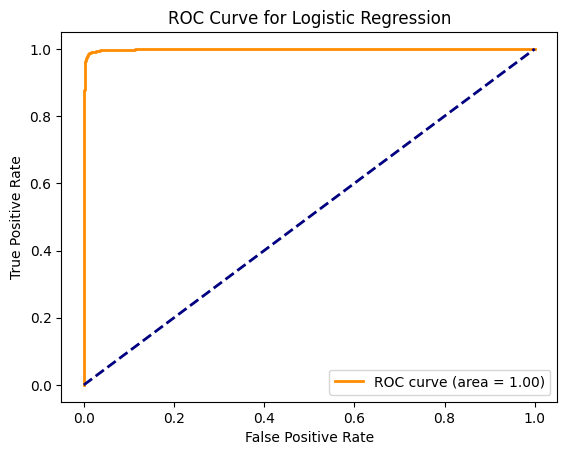

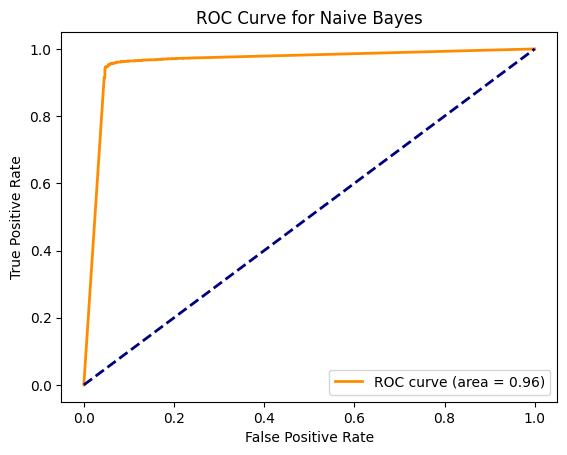

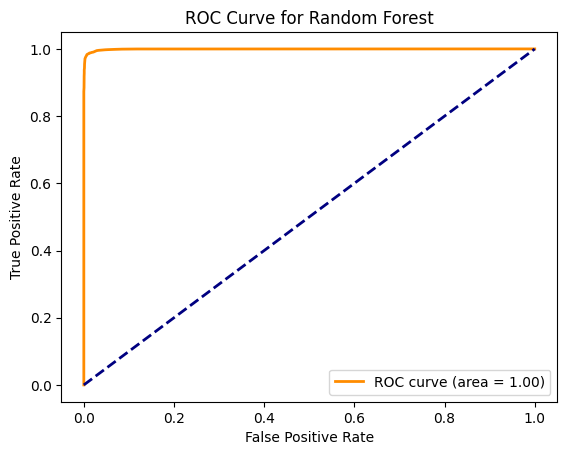

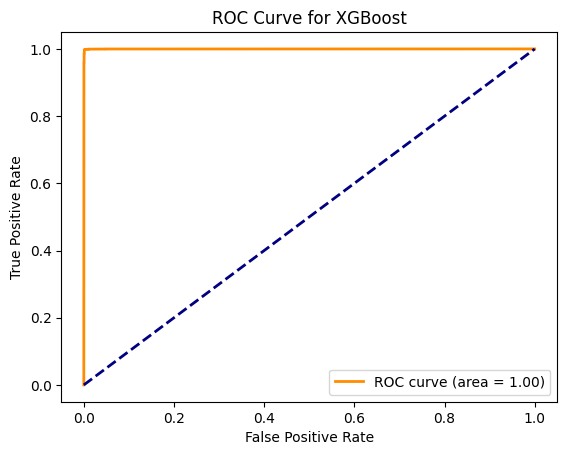

In [39]:
def plot_roc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

y_scores_logreg = logreg.decision_function(X_test_scaled)
plot_roc_curve(y_test, y_scores_logreg, 'ROC Curve for Logistic Regression')

y_scores_nb = naive_bayes.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_scores_nb, 'ROC Curve for Naive Bayes')

y_scores_rf = rf.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_scores_rf, 'ROC Curve for Random Forest')

y_scores_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_scores_xgb, 'ROC Curve for XGBoost')


# Confusion Matrix Visualization

### Confusion Matrix for Model Evaluation:
The **confusion matrix** is plotted for each model to evaluate its performance in terms of **True Positives (TP)**, **False Positives (FP)**, **True Negatives (TN)**, and **False Negatives (FN)**. The matrix helps to visualize the model's prediction results.

### Steps:
1. **Logistic Regression**: The predictions from the Logistic Regression model are used to plot the confusion matrix.
2. **Naive Bayes**: Similarly, the predictions from the Naive Bayes model are plotted.
3. **Random Forest**: The predictions from the Random Forest model are used to plot the confusion matrix.
4. **XGBoost**: Finally, the predictions from the XGBoost model are used to plot the confusion matrix.

### Visualization:
- The confusion matrix is visualized using a **heatmap** with the color map `Greens`.
- The plot labels the **True Label** (actual values) on the Y-axis and **Predicted Label** on the X-axis.
- The annotations on the heatmap show the number of predictions in each category.

This helps to understand how well each model distinguishes between the **True News** and **Fake News** categories, and provides insight into the types of errors made by each model.


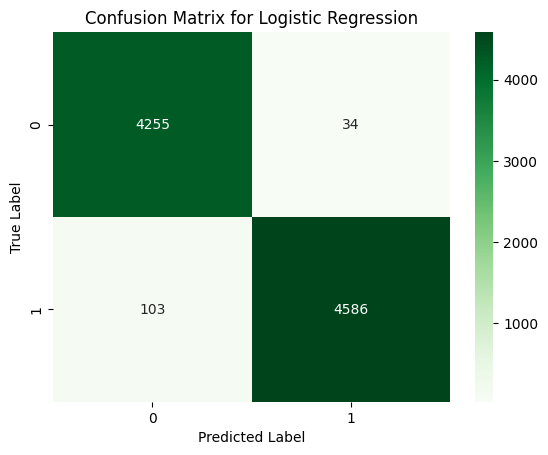

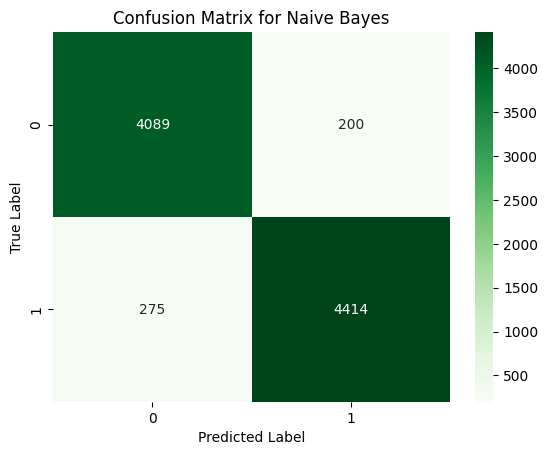

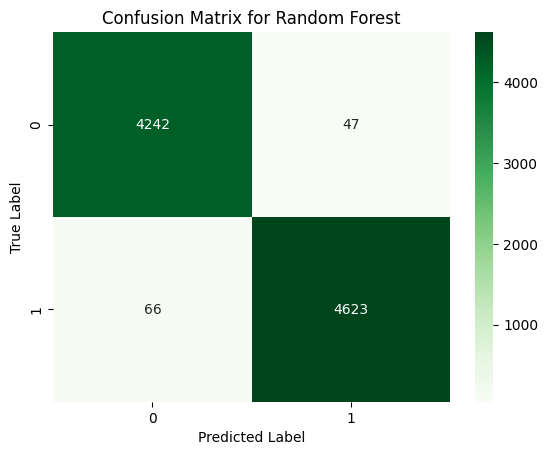

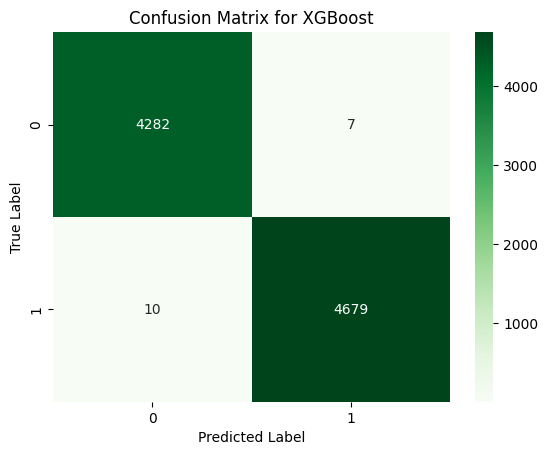

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

logreg_preds = logreg.predict(X_test_scaled)
naive_bayes_preds = naive_bayes.predict(X_test_scaled)
rf_preds = rf.predict(X_test_scaled)
xgb_preds = xgb_model.predict(X_test_scaled)

plot_confusion_matrix(y_test, logreg_preds, 'Confusion Matrix for Logistic Regression')
plot_confusion_matrix(y_test, naive_bayes_preds, 'Confusion Matrix for Naive Bayes')
plot_confusion_matrix(y_test, rf_preds, 'Confusion Matrix for Random Forest')
plot_confusion_matrix(y_test, xgb_preds, 'Confusion Matrix for XGBoost')


# Text Prediction with Multiple Models

### Preprocessing the Text:
Before making predictions, the input text is preprocessed using the `preprocess_text()` function:
- **Lowercase**: The text is converted to lowercase to ensure consistency.
- **Remove Punctuation**: All non-alphanumeric characters are removed using a regular expression.
- **Stopwords Removal**: Common words (like "the", "and", etc.) are removed using the NLTK stopword list.
- **Stemming**: Words are reduced to their root form (e.g., "running" becomes "run") using the **Porter Stemmer**.

### Predicting the News Type:
The preprocessed text is then vectorized using the previously fitted **TF-IDF vectorizer**. The text is transformed into a numerical format that can be understood by the model. The model then makes a prediction:
- **1** for **Fake News**
- **0** for **Real News**

### Predictions with Different Models:
The `predict_fake_news()` function is used to make predictions using four models:
1. **Logistic Regression**
2. **Naive Bayes**
3. **Random Forest**
4. **XGBoost**

The predictions for each model are printed, showing whether the news is classified as **Fake News** or **Real News**.

In [41]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

def predict_fake_news(text, model=logreg_model):
    processed_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([processed_text])
    prediction = model.predict(vectorized_text)

    if prediction[0] == 1:
        return "Fake News"
    else:
        return "Real News"

new_news = """
The U.S. President announced that the country will be sending aid to support countries affected by recent natural disasters.
This is part of a larger global effort to combat climate change and support international communities in need.
"""

result_logreg = predict_fake_news(new_news, model=logreg_model)
print(f"Prediction (Logistic Regression): {result_logreg}")

result_nb = predict_fake_news(new_news, model=naive_bayes_model)
print(f"Prediction (Naive Bayes): {result_nb}")

result_rf = predict_fake_news(new_news, model=rf_model)
print(f"Prediction (Random Forest): {result_rf}")

result_xgb = predict_fake_news(new_news, model=xgb_model)
print(f"Prediction (XGBoost): {result_xgb}")


Prediction (Logistic Regression): Fake News
Prediction (Naive Bayes): Real News
Prediction (Random Forest): Fake News
Prediction (XGBoost): Fake News
